<a href="https://colab.research.google.com/github/rohanjaiswal2001/Stock-Predictor-LSTM/blob/main/Predicting_Stocks_Using_LSTM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This program aims to use an aritificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a Stock (EG. AAPL using the past 60 day stock price. 

In [ ]:
import numpy  as np
import pandas as pd 
import math 
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, Dropout, LSTM 
import matplotlib.pyplot as plt 
plt.style.use("fivethirtyeight")
from nsepy import get_history as gh
import datetime as dt

In [ ]:
#Getting the Stock Quote
company = "AAPL"

In [ ]:
start = dt.datetime(2004,1,1)
end = dt.datetime(2021,7,2)


In [ ]:
data = web.DataReader(company, 'yahoo', start, end)
data

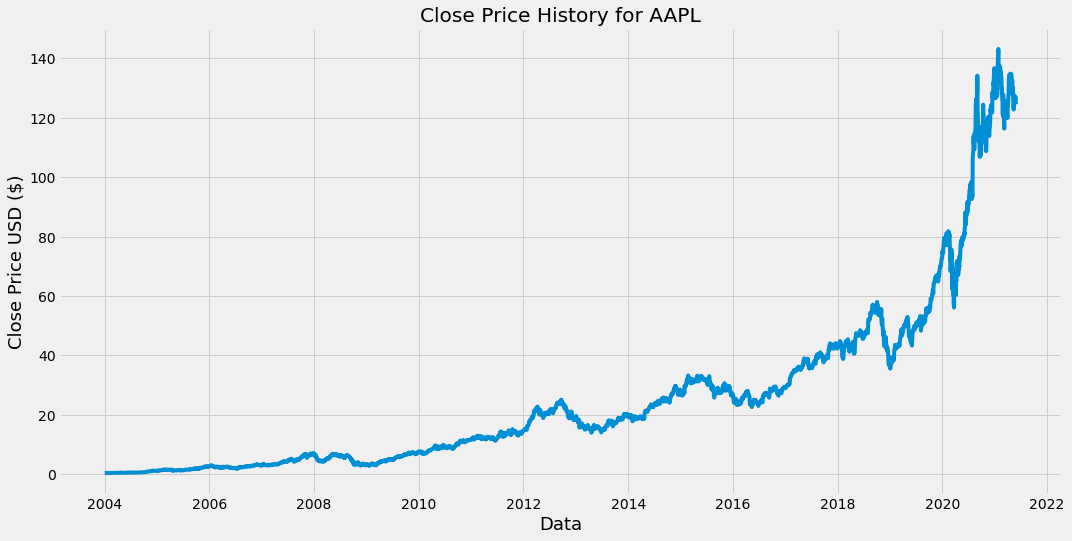

In [ ]:
#Visualizing the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History for '+company)
plt.plot(data['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [ ]:
#DF with only the 'Close Column
closedata = data.filter(['Close'])
#Converting dataframe to numpy array and training the model
dataset = closedata.values
training_data_len = (len(dataset)* Train_split)
training_data_len
int(training_data_len)

3505

In [ ]:
#Scaling the Data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

In [ ]:
#Creating the training data set with scaled data  
train_data = scaled_data[0:int(training_data_len) , :]

#Splitting the data into x and y data sets

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<= 60:
    print(x_train)
    print(y_train)

In [ ]:
#Converting x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshaping the data 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(3445, 60, 1)

In [ ]:
#Building the LSTM model 
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(units=1))

In [ ]:
#Compiling the model 
model.compile(optimizer= 'adam' , loss = "mean_squared_error")

In [ ]:
#Training the model

model.fit(x_train, y_train, batch_size=1, epochs=1)

In [ ]:
#Testing dataset
#New Array containing scaled values from index 3319 to 4400
test_data = scaled_data[int(training_data_len)-60: , :]
#Data Sets 
x_test = []
y_test = dataset[int(training_data_len):, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
#Convert the data to a numpy array 
x_test = np.array(x_test)


In [ ]:
#Reshaping the data to a 3D array
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [ ]:
#Predicting values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
#Evaluating RMSE for my model
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


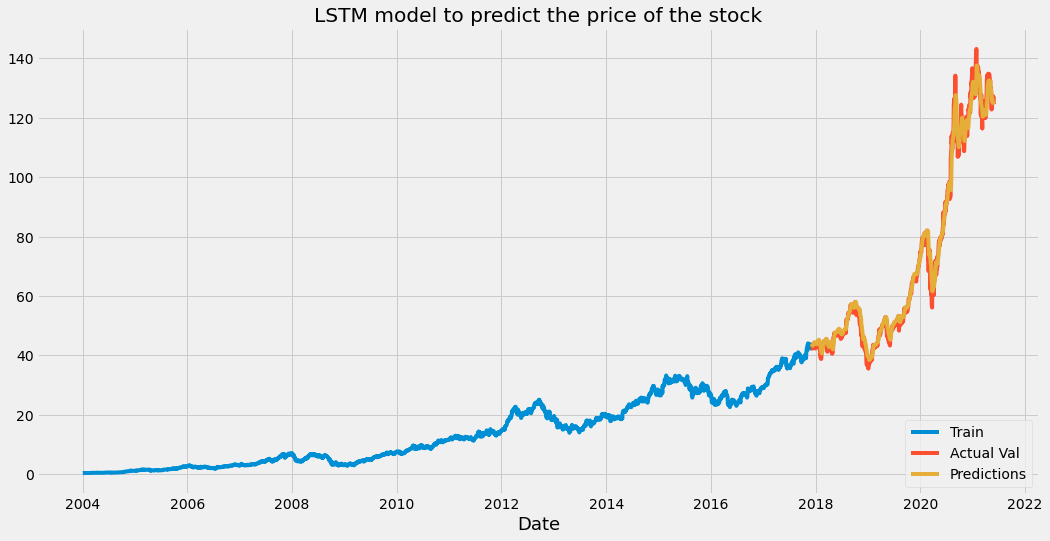

In [ ]:
#Plotting the data 
train = data[0:int(training_data_len)]
valid = data[int(training_data_len):]
valid['Predictions'] = predictions 

#Visualizing the model 
plt.figure(figsize=(16,8))
plt.title('LSTM model to predict the price of the stock')
plt.xlabel('Date', fontsize= 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual Val', 'Predictions'], loc= 'lower right')
plt.show()

In [ ]:
#Showing the Actual Value and Prediction Pricing 
valid 


In [ ]:
predictions

In [ ]:
#Predicting value for a particular day - 2021,05,28
apple_quote = web.DataReader('AAPL', 'yahoo', start, end)
new_data = apple_quote.filter(['Close'])
last_60 = new_data[-60:].values
last_60_scaled = scaler.transform(last_60)
X_test = []
X_test.append(last_60_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)
print(predicted_price)

[[125.538536]]
